Q1 Your views about the problem statement?

Tech consulting firms possess extensive datasets of qualified candidates. Byusingg machine learning, they can address various challenges. Analyzing historical employee data, which includes qualifications, experience, performance, and salary, enables the training of a regression model. This model can then effectively predict the salaries of prospective employees based on their qualifications, experience, and other relevant factors.








 Q2 What will be your approach to solving this task?

 1. coverting categorical data in numericals through dummies and other means
 2. Checking for outliers and missing values through graphs and descriptive stats.
 3. Fixing them
 4. Making a correlation chart to check multi collinearity
 5. Doing test train split
 6. Implementing different models and train them through training data 
 7. Checking and comparing their accuracy through R square

Q3. What were the available ML model options you had to perform this task?
  I had multiple regression model to choose from. I did many of them as listed with their test accuracy.
  
 1. Linear regression - For experimentation and training
 2. Multi linear Regression- 0.53
 3. Ridge Regression -0.53
 4. Decision Tree- 0.60
 6. Bagging- 0.659
 7. Random forest- 0.66
 8. Random forest(grid search)- 0.62
 9. Boosting -0.53
 10. XG Boosting- 0.59
 11. Stacking - 0.48

Q4. Which model’s performance is best and what could be the possible reason for that?

Random forest has given best result with accuracy of 0.66 highest of all.

1. Random Forest excels in capturing non-linear patterns within the data, making it particularly effective when dealing with complex relationships between features and the target variable compared to linear regression models.
2. 
With its inherent feature selection mechanism, Random Forest offers an advantage in handling high-dimensional datasets or situations where irrelevant features are present. It considers subsets of features for each tree, aiding in identifying important predictors
.3. 

Random Forest demonstrates robustness to outliers and noisy data, distinguishing it from certain regression techniques. This resilience allows it to maintain performance even in the presence of outliers within the dataset.

Q5. What steps can you take to improve this selected model’s performance even further?

Gathering more data. Gather data more data, if feasible, will enhances models ability to generalize
Hyper parameter tuning. Fine tuning model hyperparameters ensures optimal performance 
Feature Engineer. Use domain knowledge to engineer features that are likely to have a strong influence on the target variable
Early stopping. Implementing early stopping to pre


# Import of data and libraries

Importing libraries and data from excel from pyhton for different tasks

In [1]:
#Importing librariries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/ML case Study.csv", header =0) #importing data 

In [3]:
df2 =pd.read_csv("C:/Users/hp/Downloads/Colleges.csv", header=0) #importing data

In [4]:
df3 = pd.read_csv("C:/Users/hp/Downloads/cities.csv", header=0)#mporting data

Taking a look of Data of different tables. There are different variables and categorical data. 

In [5]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [6]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# Data PreProcessing

Encoding categorical college data with tier number from table describing the tier of college.

In [8]:
#putting data in the list for processing
tier1= df2["Tier 1"].tolist()
tier2= df2["Tier 2"].tolist()
tier3= df2["Tier 3"].tolist()

In [9]:
#Giving numerical value to colleges
for item in df.College:
    if item in tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in tier3:
        df["College"].replace(item,3,inplace=True)

Encoding categorical city data with tier number from table specifying the their whether they are metro or non metro

In [10]:
Metro= df3["Metrio City"].tolist()
N_Metro= df3["non-metro cities"].tolist()


In [11]:
#Giving numerical value to city
for item in df.City:
    if item in Metro:
        df["City"].replace(item,1,inplace=True)
    elif item in N_Metro:
        df["City"].replace(item,0,inplace=True)
    
    

In [12]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


Encoding role which is given as categorical data in numerical data via dummy variable.

In [13]:
#creating dummies for role and dropping other Variable to avoid redundancy
df =pd.get_dummies(df, drop_first ="True", dtype ="int")

In [14]:
#Descriptive data to find outliers. No Outliers found.
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [15]:
#data info get the count of data point in each variable. No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [16]:
# correlation matrix for finding multicollianrity between variables and very low correlation
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


Checking for outliers via graphical reprsentation and taking other information

<Axes: xlabel='College', ylabel='count'>

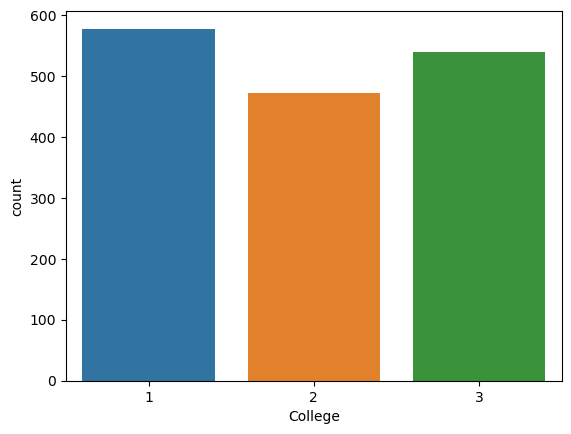

In [17]:
sns.countplot(data=df, x="College") #Plotting graph for count of colleges

<Axes: xlabel='City', ylabel='count'>

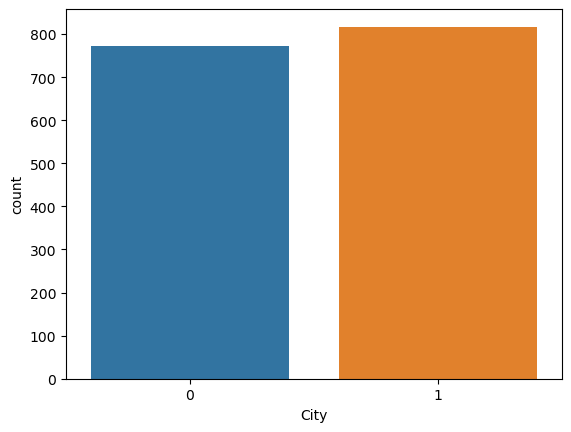

In [18]:
sns.countplot(data=df, x="City") #Plotting graph for count of city

No. of colleges across tiers are not that much different. No. of metro and non metro cities are also same.

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


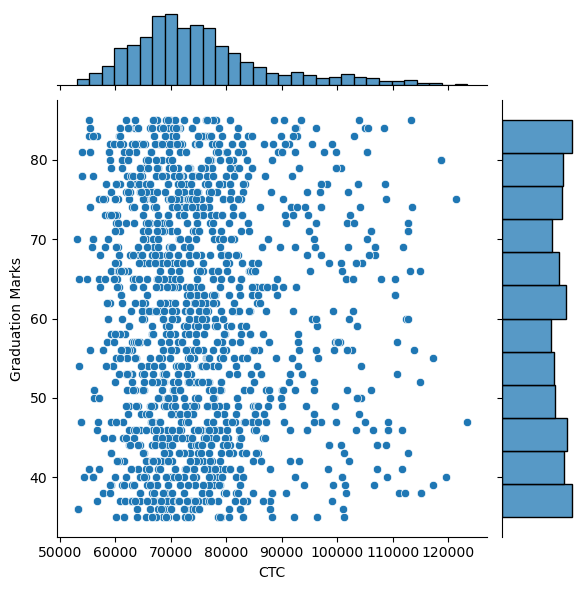

In [19]:
sns.jointplot(x="CTC", y="Graduation Marks",data=df)

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


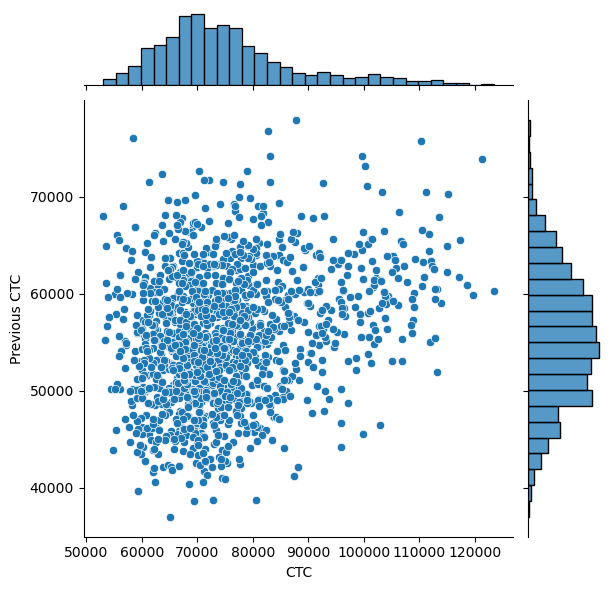

In [20]:
sns.jointplot(x="CTC", y="Previous CTC",data=df)

In previous CTC there are some potential outliers on high side and low side.

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

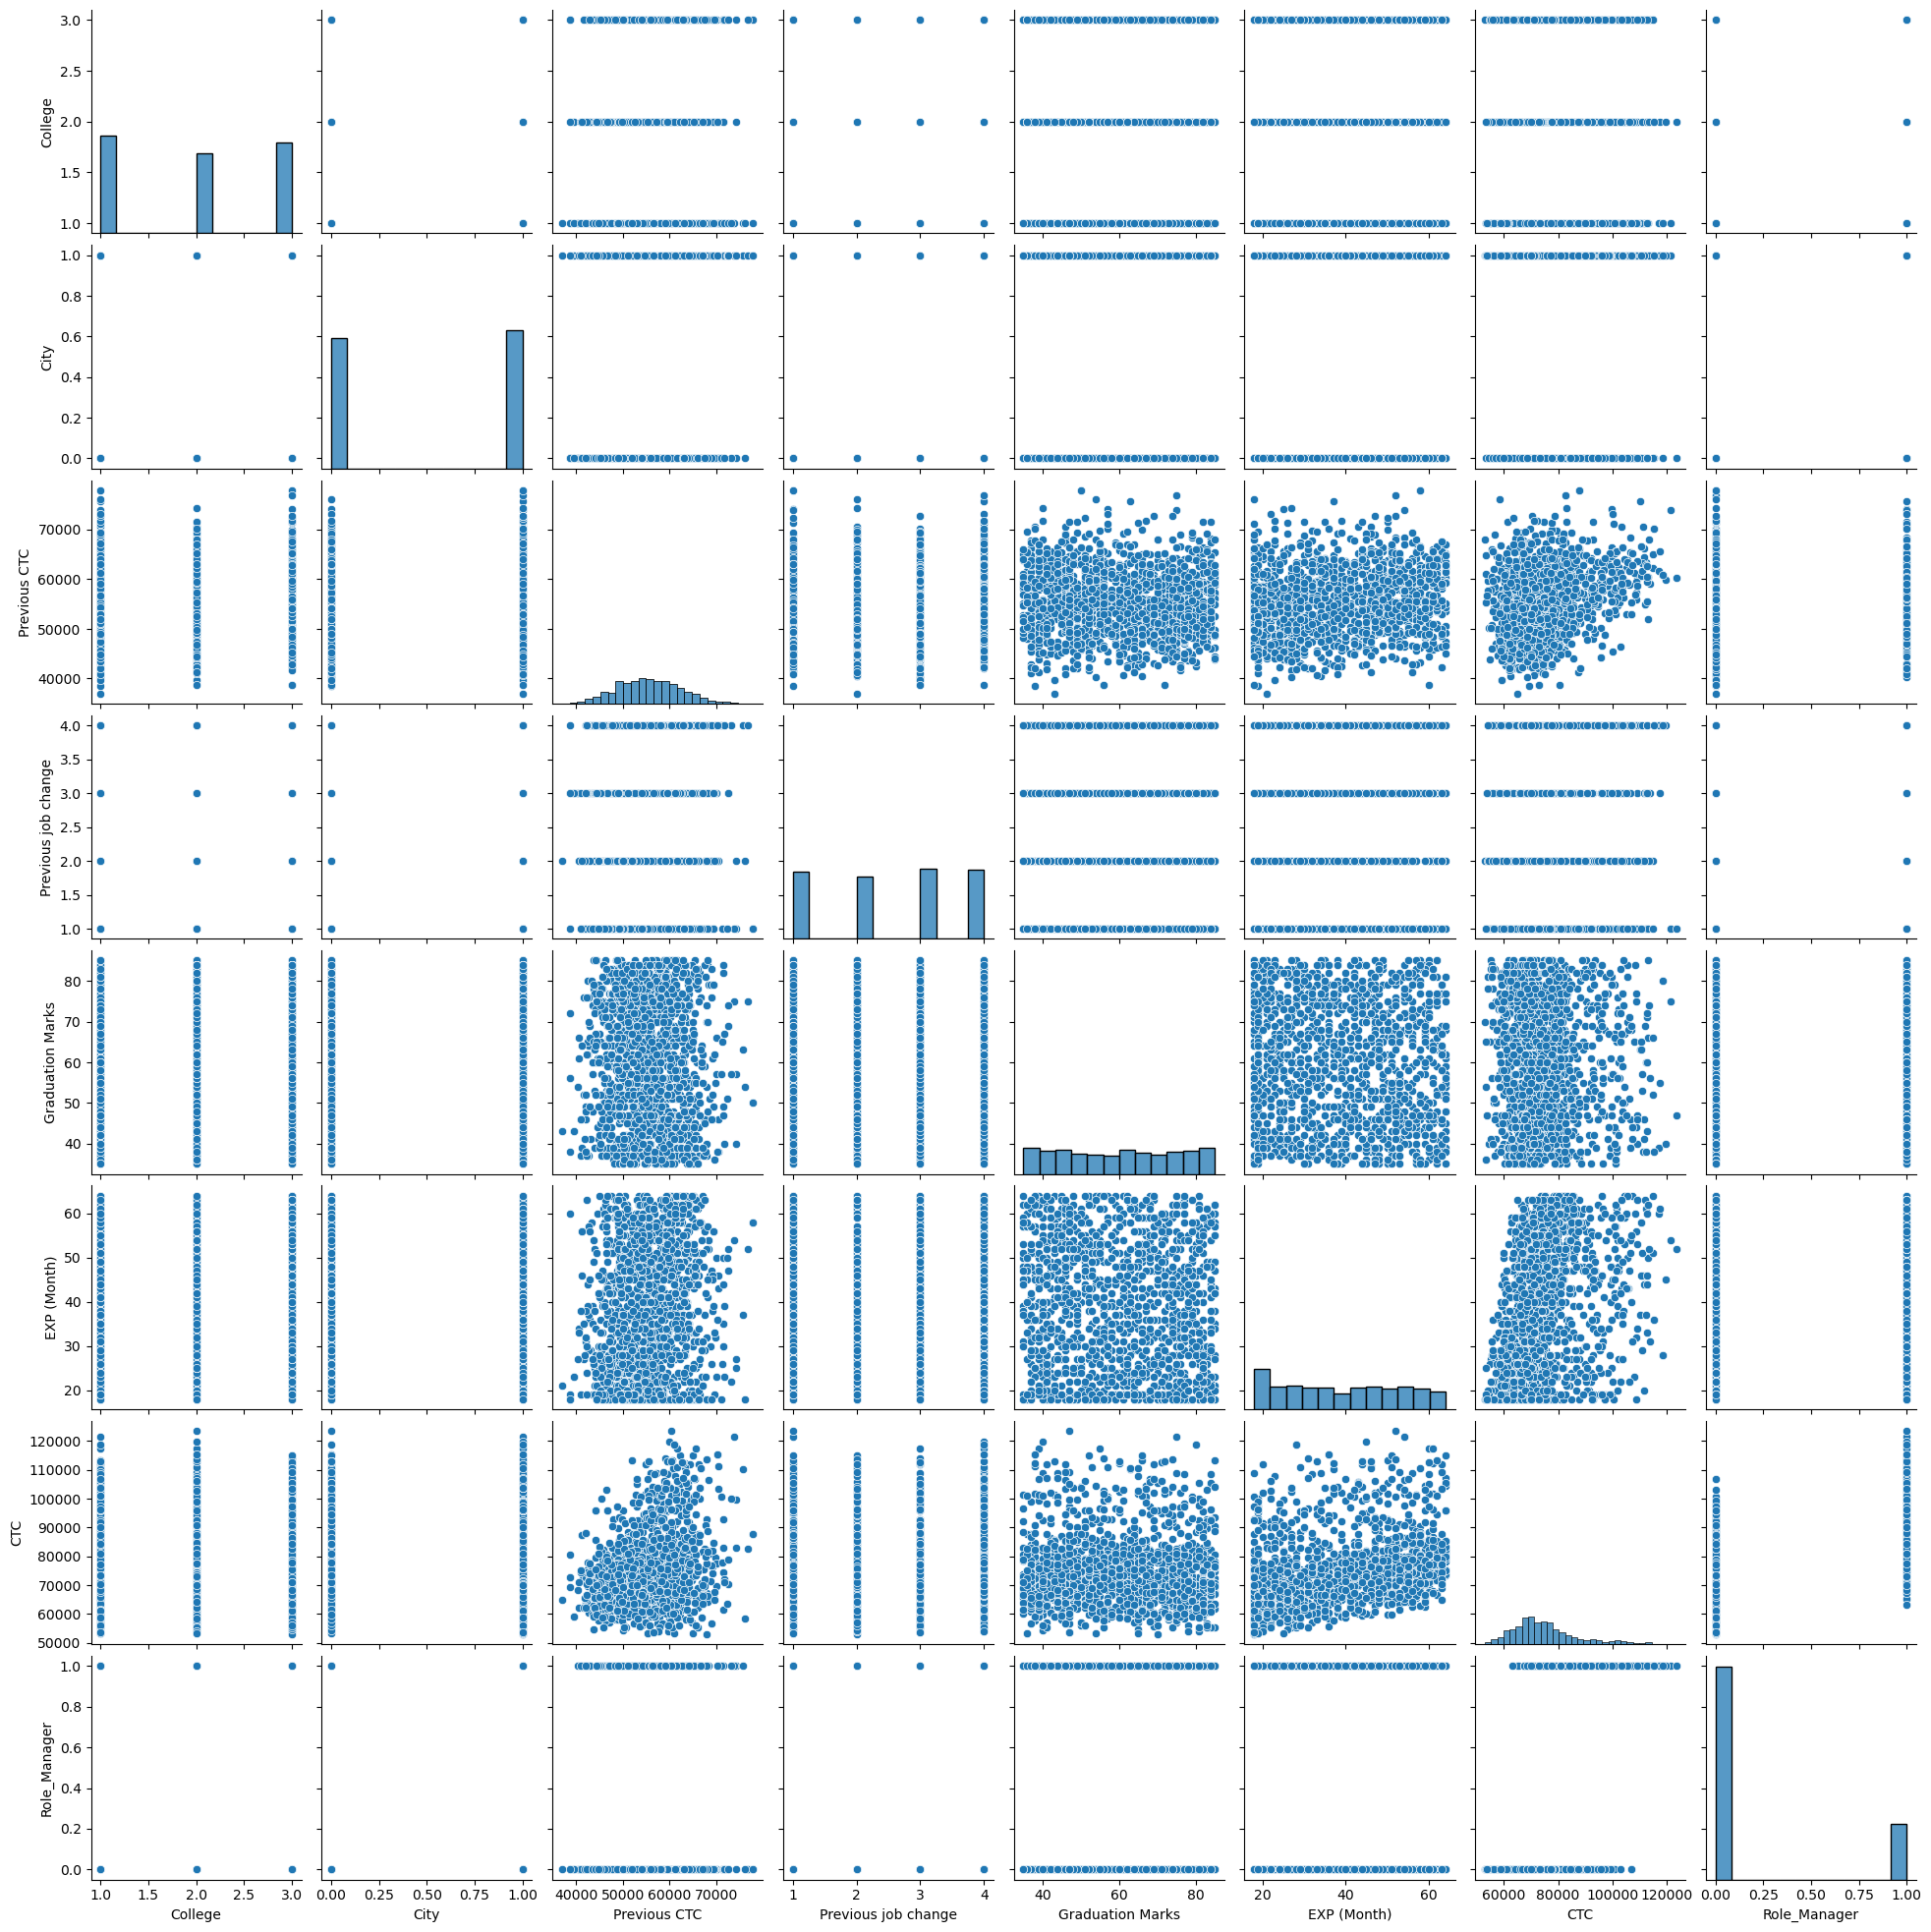

In [21]:
sns.pairplot(df)

<Axes: xlabel='Previous CTC'>

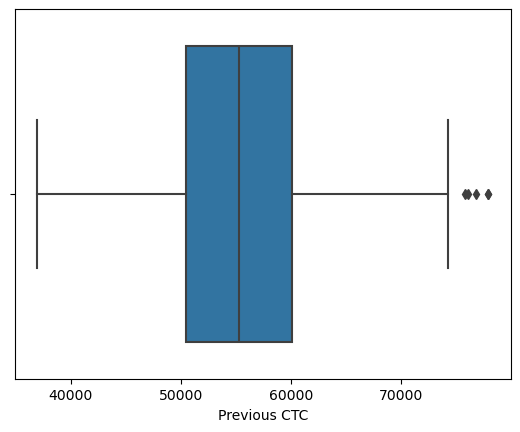

In [22]:
sns.boxplot(x="Previous CTC", data=df)


<Axes: xlabel='CTC'>

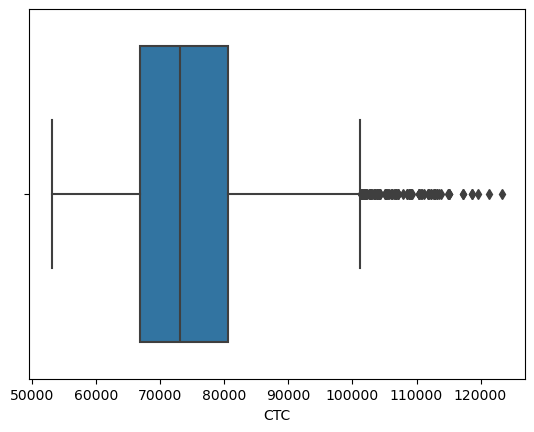

In [23]:
sns.boxplot(x="CTC", data=df)


### Founding any outliers in previous CTC with the help of numpy percentile

In [24]:
np.percentile(df["Previous CTC"],99)

71506.92

In [25]:
uv= np.percentile(df["Previous CTC"],99)

In [26]:
df[(df["Previous CTC"]>uv)].sort_values(by='Previous CTC', ascending=True)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
572,1,1,71543.0,4,82,30,61366.78,0
701,2,0,71549.0,4,47,50,83116.21,0
847,1,1,71756.0,4,67,23,72141.43,0
1067,3,0,71760.0,4,40,39,71187.52,0
941,3,1,72319.0,1,51,50,63538.43,0
1332,3,1,72649.0,3,69,52,78861.46,0
1024,1,1,72661.0,3,74,47,70238.70,0
1047,1,0,73214.0,4,57,22,100119.53,1
543,1,1,73856.0,1,75,54,121362.73,1
292,3,0,74198.0,1,57,25,99644.51,1


No outliers are found in the upper end of previous ctc column. Progrssion of the numbers is natural and ther is no jummp.

In [27]:
np.percentile(df["Previous CTC"],1)

41587.92

In [28]:
lv= np.percentile(df["Previous CTC"],1)

In [29]:
df[(df["Previous CTC"]<lv)].sort_values(by='Previous CTC', ascending=True)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
428,1,1,36990.0,2,43,21,65008.02,0
410,1,0,38605.0,1,38,19,69365.78,0
172,3,0,38709.0,3,56,18,72747.12,0
1510,2,1,38709.0,3,56,18,72747.12,0
1074,3,0,38765.0,4,72,60,80489.55,0
28,2,1,39636.0,3,43,23,59230.44,0
1366,1,0,39636.0,3,43,23,59230.44,0
994,1,0,40365.0,3,54,27,68402.56,1
613,1,0,40574.0,2,66,34,62314.99,0
684,1,1,40632.0,2,61,33,71017.54,0


No outliers are found in the lower end of previous ctc column. Progrssion of the numbers is natural and ther is no jumm

### Founding any outliers in CTC with the help of numpy percentile

In [30]:
np.percentile(df["CTC"],99)

112826.26

In [31]:
uv= np.percentile(df["CTC"],99)

In [32]:
df[(df["CTC"]>uv)].sort_values(by='CTC', ascending=True)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
254,2,1,51912.0,2,66,50,113141.14,1
668,1,1,60476.0,1,85,62,113212.07,1
1240,2,1,67907.0,2,74,52,113508.80,1
577,3,1,59101.0,3,56,31,113843.16,1
883,3,1,64930.0,1,66,51,114939.65,1
328,3,0,62264.0,2,52,64,114996.23,1
185,2,0,70258.0,4,38,36,115126.75,1
1523,2,1,70258.0,4,38,36,115126.75,1
1146,1,1,61709.0,4,39,60,117207.24,1
1284,2,1,65519.0,3,55,61,117307.70,1


No outliers are found in the ctc column. Progrssion of the numbers is natural and there is no jump.

# Regression

In [33]:
import statsmodels.api as sm

test train split is important part of the regression analysis as the testing on data tell us how much true is data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = sm.add_constant(df["Previous CTC"]) #adding constant to independent variable

In [36]:
lm = sm.OLS(df.CTC, x).fit() # 

In [37]:
 lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.41e-25
Time:                        14:09:22   Log-Likelihood:                -17200.
No. Observations:                1589   AIC:                         3.440e+04
Df Residuals:                    1587   BIC:                         3.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.826e+04   2564.822     18.817      0.000    4.32e+04    5.33e+04
Previous CTC     0.4880      0.046     10.638      0.000       0.398       0.578
==============================================================================
Omnibus:                      173.415   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.003
Skew:                           0.864   Prob(JB):                     9.33e-52
Kurtosis:                       3.752   Cond. No.                     4.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MULTI REGRESSION

Doing regression analysis with multiple independent variables will tell us how each variable effect our target dependent variable. 

In [38]:
x_multi=df.drop("CTC",axis = 1)
y_multi=df.CTC

In [39]:
x_multi_cons=sm.add_constant(x_multi)

In [40]:
lm_multi=sm.OLS(y_multi,x_multi_cons).fit()

In [41]:
#getting the summary fo the multi regression
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 24 May 2024   Prob (F-statistic):          4.70e-257
Time:                        14:09:22   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# splitting data between test and train datasets
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

Splitting data between training and testing. Test train split will train a part of data. Then the dependent variables will be matched against the predicted value so to the accuracy of the data.

In [44]:
#implementing linear regression fitting data
lm2=LinearRegression()
lm2.fit(x_train,y_train)

LinearRegression()


This code snippet predicts the target variable for both the test and training datasets using a linear regression model

In [45]:
#preparing data for checking score
y_test_a=lm2.predict(x_test)
y_train_a=lm2.predict(x_train)

In [46]:
from sklearn.metrics import r2_score

In [47]:
#testing test score
r2_score(y_test,y_test_a)

0.5355989894790059

In [48]:
r2_score(y_train,y_train_a)

0.5331293335456955

# Ridge Regression


Ridge regression adds an L2 penalty (squared magnitude of coefficients) to the loss function to shrink coefficients and reduce multicollinearity.

In [49]:
from sklearn import preprocessing

In [50]:
#standardising Data
scaler=preprocessing.StandardScaler().fit(x_train)

In [51]:
x_train_s=scaler.transform(x_train)
x_test_s=scaler.transform(x_test)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
#fitting Ridge regrssion data
lm_r=Ridge(alpha=0.5)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [54]:
#preparing data for checking score
y_test_a=lm_r.predict(x_test_s)
y_train_a=lm_r.predict(x_train_s)

In [55]:
r2_score(y_train, y_train_a)

0.5331292560773075

In [56]:
r2_score(y_test,y_test_a)

0.5355848845406525

In [57]:
from sklearn.model_selection import validation_curve

In [58]:
#Making differnt parameters between a giving range
param_range =np.logspace(-2,8,100)

In [59]:
#making validation curve
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [60]:
#mean of scores 
train_mean =np.mean(train_scores, axis=1)
test_mean =np.mean(test_scores, axis=1)

In [61]:
#maxmum score
max(test_mean)

0.5258291929838951

# Lasso regression

Lasso regression adds an L1 penalty (absolute value of coefficients) to the loss function, promoting sparsity by potentially setting some coefficients to zero.

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lm_l = Lasso(alpha=0.5) 
#fitting Ridge regrssion data
lm_l.fit(x_train_s, y_train)

Lasso(alpha=0.5)

In [64]:
#preparing data for checking score
y_test_a=lm_l.predict(x_test_s)
y_train_a=lm_l.predict(x_train_s)

In [65]:
r2_score(y_train, y_train_a)

0.5331293230548312

In [66]:
r2_score(y_test,y_test_a)

0.5356055546226256

# Decision tree

A decision tree regressor is a machine learning model that predicts continuous outcomes by recursively partitioning the feature space into regions and assigning a constant value to each region based on the average of the target variable.

In [67]:
from sklearn import tree

In [68]:
#defining and fiiting decision regrssion tree
regtree = tree.DecisionTreeRegressor(max_depth =4)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [69]:
y_test_a= regtree.predict(x_test)
y_train_a=regtree.predict(x_train)

In [70]:
(y_train, y_train_a)

(1062    102928.71
 215      76811.45
 654      77733.27
 55      110438.17
 1187     74204.19
           ...    
 763      75374.60
 835      65084.43
 1216     67304.59
 559      68107.12
 684      71017.54
 Name: CTC, Length: 1271, dtype: float64,
 array([106084.26656716,  68706.52247934,  80040.57      , ...,
         71693.57582524,  66709.39544073,  68706.52247934]))

In [71]:
from IPython.display import Image
import pydotplus

In [72]:
#generates a Graphviz representation of a decision tree model
dot_data =tree.export_graphviz(regtree, out_file= None, filled= True)

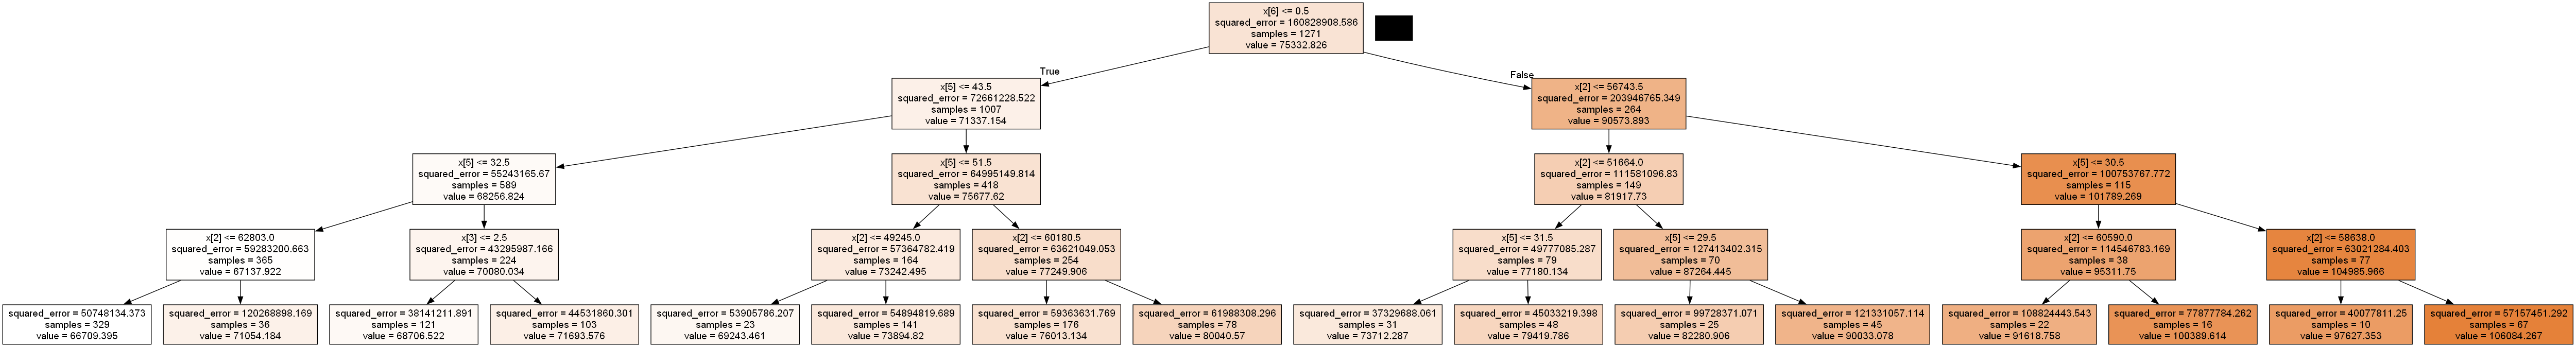

In [73]:
#making image of decision tree
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [74]:
r2_score(y_train, y_train_a)

0.6397831325660944

In [75]:
r2_score(y_test,y_test_a)

0.603220439065417

# Bagging

A bagging regressor is an ensemble machine learning method that combines multiple base regressors trained on random subsets of the training data to improve prediction accuracy and robustness.

In [76]:
from sklearn import tree
RegTree= tree.DecisionTreeRegressor()

In [77]:
from sklearn.ensemble import BaggingRegressor

In [78]:
Bag_reg= BaggingRegressor(base_estimator= RegTree, n_estimators =1000,
                          bootstrap=True, n_jobs= -1,
                          random_state=42)

In [79]:
Bag_reg.fit(x_train, y_train)

C:\Users\hp\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [80]:
y_test_a=Bag_reg.predict(x_test)
y_train_a=Bag_reg.predict(x_train)

In [81]:
r2_score(y_train, y_train_a)

0.9507980903106926

In [82]:
r2_score(y_test, y_test_a)

0.6592849814181121

# Random forest


A Random Forest regressor is an ensemble learning technique that constructs multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks.

In [83]:
from  sklearn.ensemble import RandomForestRegressor

In [84]:
#defining decision regrssion tree
Regressor = tree.DecisionTreeRegressor(max_depth =4)

In [85]:
#staring a random forest generator
Regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state= 42)

In [86]:
Regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [87]:
y_test_a= Regressor.predict(x_test)
y_train_a=Regressor.predict(x_train)

In [88]:
r2_score(y_train, y_train_a)

0.9507120969482583

In [89]:
r2_score(y_test, y_test_a)

0.6607840939246612

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = { 'n_estimators': [1000, 2000, 3000, 4000, 5000],
                'max_depth': [1, 2, 3, 4, 5]}

In [92]:
grid_search = GridSearchCV(estimator=Regressor, param_grid=param_grid, cv=5, n_jobs=-1)

In [93]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1000, 2000, 3000, 4000, 5000]})

In [94]:
grid_search.best_params_['n_estimators']

2000

In [95]:
grid_search.best_params_['max_depth']

5

In [96]:
y_test_a= grid_search.predict(x_test)
y_train_a=grid_search.predict(x_train)

In [97]:
r2_score(y_train, y_train_a)

0.6966412456838766

In [98]:
r2_score(y_test, y_test_a)

0.6211942587049527

# Boost

A boosting regressor is a machine learning technique that combines multiple weak learners sequentially, with each subsequent learner focusing on the mistakes of its predecessors, to improve overall prediction accuracy for regression tasks.

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
#defining And fitting Gradient Boosting Regresso
gb_reg = GradientBoostingRegressor(learning_rate =0.2, n_estimators =1000, max_depth=1)
gb_reg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, n_estimators=1000)

In [101]:
y_test_a= gb_reg.predict(x_test)
y_train_a=gb_reg.predict(x_train)

In [102]:
r2_score(y_train, y_train_a)

0.5874712050653834

In [103]:
r2_score(y_test, y_test_a)

0.5308829457094371

# XG Boost


XGBoost regressor is an implementation of gradient boosting with optimized performance and regularization techniques, excelling in predictive accuracy for regression tasks.

In [104]:
import xgboost as xgb

In [105]:
#initiatinga XG Boosting
xgb_r = xgb.XGBRegressor(max_depth =5, n_estimators = 1000, learning_rate = 0.3, n_jobs= -1)

In [106]:
#fitting the data for XG Boost
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
y_test_a= xgb_r.predict(x_test)
y_train_a=xgb_r.predict(x_train)

In [108]:
r2_score(y_train, y_train_a)

0.9999996307754098

In [109]:
r2_score(y_test, y_test_a)

0.5901009810489486

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

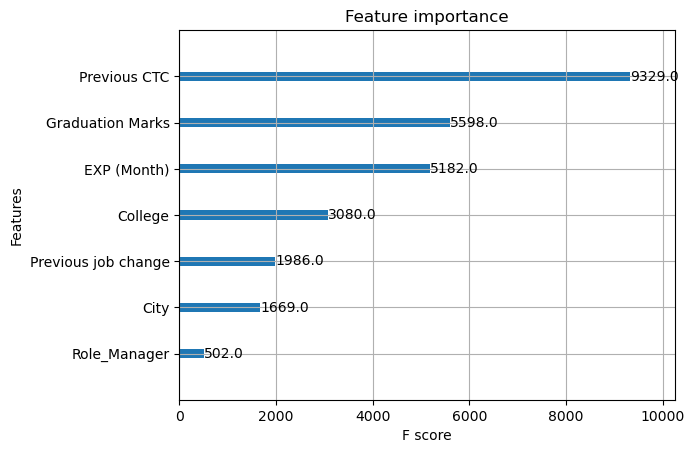

In [110]:
#plotting graph for importance of each variable
xgb.plot_importance(xgb_r)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [112]:
scorer = make_scorer(r2_score)

In [113]:
param_test= {
    'max_depth': (3,5,7,9),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha': [1e-2,0.1,1]
}

In [114]:
grid_search = GridSearchCV( xgb_r, param_test, n_jobs=-1, cv=5, scoring = scorer, error_score ='raise')

In [115]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': (3, 5, 7, 9),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring=make_scorer(r2_score))

In [116]:
y_test_a= grid_search.predict(x_test)
y_train_a=grid_search.predict(x_train)

In [117]:
r2_score(y_train, y_train_a)

0.9999993645209408

In [118]:
r2_score(y_test, y_test_a)

0.5802034597479918

# Stacking

A stacking regressor is an ensemble learning technique that combines predictions from multiple individual regressors using a meta-regressor, often yielding improved performance by leveraging diverse modeling approaches.

In [119]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [120]:
estimators = [
    ('ridge', Ridge()),
    ('svr', SVR(kernel='linear'))
]

In [121]:
stacking= StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=1000, random_state=42))
stacking.fit(x_train, y_train)

StackingRegressor(estimators=[('ridge', Ridge()),
                              ('svr', SVR(kernel='linear'))],
                  final_estimator=RandomForestRegressor(n_estimators=1000,
                                                        random_state=42))

In [122]:
y_test_a= stacking.predict(x_test)
y_train_a=stacking.predict(x_train)

In [123]:
r2_score(y_train, y_train_a)

0.6104856427240177

In [124]:
r2_score(y_test, y_test_a)

0.48651713637234073